# Introduction to Julia

* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets

## Interesting features:
 * Julia is build from the ground for techical computing. 
 * The language is close to the mathematical notation, for example to define a function $f(x) = 2x + 3$ in Julia is:

```julia
f(x) = 2x + 3
```
  
 * Julia is free and open-source software.
 * Julia's code is compiled to machine code and loops can be as fast as in other compiled languages (like Fortran or C)


## Instructions for installing Julia on your laptop

* If you want to install Julia on your laptop later on, here are some instructions
* Go to http://julialang.org/downloads/
* There are various editor with support for Julia (like atom, notepad++, emacs, vim...)

### Ways to run Julia:

#### Command line

* Use the `Tab` key to complete file, variable and function names
* `Up` and `down arrows` key to repeat a previously entered command
* `Control-R` to search a command
* On Windows enable "[quick edit](https://www.tekrevue.com/tip/boost-productivity-quickedit-mode-windows-command-prompt/)" for easier copy and pasting
![cmd](Fig/julia-commandline.png)

#### Jupyter notebook (web-browser)

* Web-interface for Julia (among others)
* The Julia package `IJulia` which also installs Jupyter http://jupyter.org/
* Various [keyboard short cuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/) are defined to be productive with jupyter notebooks
* General documentation of [Jupyter Notebooks](http://jupyter-notebook.readthedocs.io)

![cmd](Fig/julia-jupyter.png)

Text can be formatted using markdown.

# Markdown

This is an explanation
* item one
* item two
   * sub item one
   * sub item two
$$ c^2 = a^2 + b^2 $$ 
   

#### Juno

* Based on the Atom editor from GitHub
* Integrates an editor, command line and documentation browser
* Available from http://junolab.org/

![atom](Fig/julia-atom.png)

# Julia documentation

* The manual: https://docs.julialang.org
* Tutorials and books: https://julialang.org/learning/


## Comparision with other languages


* [Noteworthy Differences from other Languages](https://docs.julialang.org/en/stable/manual/noteworthy-differences/)
* In particular (difference from Matlab):
   * Julia arrays are indexed with square brackets, `A[i,j]`.
   * Julia arrays are assigned by reference. After A=B, changing elements of B will modify A as well.
   * Julia function parameters are passed and assigned by reference. If a function modifies an array, the changes will be visible in the caller.
   * A bang (!) indicates if a function changes one of its argument
   * In Julia, parentheses must be used to call a function with zero arguments, like in tic() and toc().
   * Julia's single quotes enclose characters, not strings.
   * Julia does not automatically grow arrays in an assignment statement. 

* Difference from Python:
   * Julia requires end to end a block.
   * In Julia, indexing of arrays, strings, etc. is 1-based not 0-based.
   * Julia's slice indexing includes the last element, unlike in Python. `a[2:3]` in Julia is `a[1:3]` in Python.
   * Julia does not support negative indexes. In particular, the last element of a list or array is indexed with end in Julia, not -1 as in Python.



* [MATLAB–Python–Julia cheatsheet](https://cheatsheets.quantecon.org/)





# First steps in Julia

## Numbers

* Use a dot (.) as decimal separator (e.g. 3.14 and not 3,14)
* You can use the scientific notation $a \times 10^{-b}$ using the e-notation. (e.g. $3 \times10^{-7}$ becomes 3e-7) 
* Use Julia as a calculator:

In [1]:
sin(pi)

1.2246467991473532e-16

In [2]:
sin(2*pi)

-2.4492935982947064e-16

* The usual operator precedence applies


## Useful constants

Various constants are also pre-defined: π (pi), e (Euler's number), im (the imaginary number), Inf (Infinity, result from e.g. 1/0) and NaN (Not a Number - result from e.g. 0/0)



## Variables

* Numbers (and any other data type) can be put into variables
* The value of a variable is referenced by its name
* A variable name can be composed by letters (a-z and A-Z, including greek letters, accents,...), numbers (0-9), underscore (_) and some unicode symbols (like greek letters). The first character cannot be a number.

* Example:

In [3]:
temp = 21

21

To see the content of the variable `temp`:

In [4]:
@show temp

temp = 21


21

Any expression can now include the variable `temp`:

In [5]:
2*temp


42

* The variable `temp` has now the value 21. The value of the variable can be changed later on.
* An assignment without a final semicolon echos its value to the screen


## Strings

* Delimited by double quotes
    	

In [6]:
s = "Hello world"
print(s)

Hello world

## Symbols

* A symbol is an [interned string](https://en.wikipedia.org/wiki/String_interning) identifier which means that every  string symbol is replaced internally by a number

* This makes comparision between symbols faster than comparision between strings
* Symbols are also used in metaprogramming (julia code which produces julia code).

In [7]:
:mysymbol

:mysymbol

## Vectors and matrices

* Vectors are list of numbers. The column vector $\left(\begin{array}{c}1 \\ 2 \\ 3 \end{array} \right)$ is represented by:

In [8]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

* Matrices are tables of numbers. Rows are separated by a semicolon. The matrix 
$\left(\begin{array}{cc}1 & 2 \\ 3 & 4 \end{array} \right)$ is represented by:

In [9]:
[1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

The determinant  can be for example computed with `det`:

In [10]:
using LinearAlgebra
det([1 2; 3 4])

-2.0

* There are no "row vectors", just matrices with one row:

In [11]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [12]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

### Ranges

* Consecutive elements can be written as

    first:step:last
    
* or simply, if the step is 1,
    	
    first:last
    
* Use the function `collect` or `[first:step:last;]` to transform a range into a vector:
   
Instead of typing this:  

In [13]:
[1,2,3,4,5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

One could simply write this as:

In [14]:
1:5

1:5

Or the full list:

In [15]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

Now if we need only every second element:

In [16]:
1:2:6

1:2:5

In [17]:
collect(1:2:6)

3-element Array{Int64,1}:
 1
 3
 5

Note that 6 is not part of the previous range.

## Indexing

* Consider the following vector:

In [18]:
a = [2,5,7,19,2]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

* Individual elements of a vector or matrix can be addressed by their index
* The second element of a vector `a` is for example `a[2]`

In [19]:
a[2]

5

In [20]:
length(a)

5

In [21]:
a[length(a)]

2

* The special word `end` refers to the last index.

In [22]:
a[end]

2

* One can also use a list of indexes to extract a part of the vector

In [23]:
a[[2,3,4]]

3-element Array{Int64,1}:
  5
  7
 19

* Or simply:

In [24]:
a[2:4]

3-element Array{Int64,1}:
  5
  7
 19

* The symbol colon : is a short-hand for 1:end

In [25]:
a[1:end]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

In [26]:
a[:]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

## Matrix indexing

* For matrices, two indices are used.
* The element at the second row and the first column of a matrix A is for example A[2,1]

In [27]:
A = [1 2; 3 4]


2×2 Array{Int64,2}:
 1  2
 3  4

In [28]:
A[2,1]

3

In [29]:
A[:,2]

2-element Array{Int64,1}:
 2
 4

In [30]:
A[1,:]

2-element Array{Int64,1}:
 1
 2

In [31]:
A[4]

4

  
    
* If a matrix is indexed with only one subscript, the matrix is treaded as a vector where all columns are concatenated

* Julia supports also higher-dimensional arrays and indexing works similarily.



# Operators

* Scalar and matrix operations: + sum, - difference, * multiplication, / division
* Element-wise matrix operations: .* multiply element-wise, ./ divide element-wise 

## Comparison operators

 * equal (==) and different (!=)
 
 

In [32]:
a = 1

1

In [33]:
2 == 1

false

In [34]:
9 == 3*3

true

In [35]:
[1 2 3] == [1 3 2]

false

In [36]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 true  false  false

* Be aware of the limited precision of floating point numbers


In [37]:
2.0000000000000001 == 2

true

 * element-wise equal (.==), element-wise different (.!=)

In [38]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 true  false  false

* comparision between numbers: <, >, <= (≤), => (≥)

In [39]:
30 > 25

true

* element-wise comparision between vector and matrices: .<, .>, .<= (.≤), .=> (.≥)

In [40]:
[1,2,3] .> 2

3-element BitArray{1}:
 false
 false
  true

In [41]:
[1,2,3] .> [3,1,2]

3-element BitArray{1}:
 false
  true
  true

* logical "and" (&&) logical "or" (||) (with short-circuit evaluation)

In [42]:
temperature = 30;
precipitation = 10;

if temperature > 25 && precipitation == 0
    print("go outside!")
end

* logical element-wise "and" (.&) logical element-wise "or" (.|)

* The results of such operators can also be used to index an array
    
* For example return all elements in the variable T which are greater than 10 but less than 20.
    

In [43]:
T = [27,17,20,26,32]
20 .< T .< 30

5-element BitArray{1}:
  true
 false
 false
  true
 false

In [44]:
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

In [45]:
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

In [46]:
T .< 30

5-element BitArray{1}:
  true
  true
  true
  true
 false

In [47]:
T = [27,17,20,26,32]
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

* The function `findall(condition)` returns the indexes of all elements where the condition is true.

In [48]:
T

5-element Array{Int64,1}:
 27
 17
 20
 26
 32

In [49]:
findall(20 .< T .& T .< 30)

2-element Array{Int64,1}:
 1
 4

* false is zero and true is 1. For instance to count the number of elements in the vector T which are larger than 20 one can use sum(T .> 20).

In [50]:
sum([1,2,3])

6

In [51]:
sum([1,0,1])

2

In [52]:
sum(T .> 20)

3

# Useful functions

* sin, cos, tan: trigonometric functions
* asin, acos, atan: inverse trigonometric functions
* log, log2, log10: natural, base 2 and base 10 logarithms: 
* exp: exponentiation
* abs: absolute value
* sqrt: square root
* mean: mean
* median: median
* std: standard deviation
* var: variance
* mod: modulo (useful to manipulate e.g. the longitude)
* isnan: Check if variable is NaN. Note that NaN == NaN is false!
* inv: inverse of a matrix
* sum: sum of all elements
* prod: product of all elements
* maximum,minimum: maximum,minimum value in an array
* max,min: maximum,minimum value of all arguments
* isnan: true if a value is NaN
* isinf: true if a value is Inf

These function can also operate of a given dimension: sum(array,dimension)

Find out more of these function by typing ? followed by the function name. 

In [53]:
?open

search: open isopen propertynames CompositeException operm getproperty



```
open(filename::AbstractString; keywords...) -> IOStream
```

Open a file in a mode specified by five boolean keyword arguments:

| Keyword    | Description            | Default                               |
|:---------- |:---------------------- |:------------------------------------- |
| `read`     | open for reading       | `!write`                              |
| `write`    | open for writing       | `truncate \| append`                  |
| `create`   | create if non-existent | `!read & write \| truncate \| append` |
| `truncate` | truncate to zero size  | `!read & write`                       |
| `append`   | seek to end            | `false`                               |

The default when no keywords are passed is to open files for reading only. Returns a stream for accessing the opened file.

---

```
open(filename::AbstractString, [mode::AbstractString]) -> IOStream
```

Alternate syntax for open, where a string-based mode specifier is used instead of the five booleans. The values of `mode` correspond to those from `fopen(3)` or Perl `open`, and are equivalent to setting the following boolean groups:

| Mode | Description                   | Keywords                       |
|:---- |:----------------------------- |:------------------------------ |
| `r`  | read                          | none                           |
| `w`  | write, create, truncate       | `write = true`                 |
| `a`  | write, create, append         | `append = true`                |
| `r+` | read, write                   | `read = true, write = true`    |
| `w+` | read, write, create, truncate | `truncate = true, read = true` |
| `a+` | read, write, create, append   | `append = true, read = true`   |

# Examples

```jldoctest
julia> io = open("myfile.txt", "w");

julia> write(io, "Hello world!");

julia> close(io);

julia> io = open("myfile.txt", "r");

julia> read(io, String)
"Hello world!"

julia> write(io, "This file is read only")
ERROR: ArgumentError: write failed, IOStream is not writeable
[...]

julia> close(io)

julia> io = open("myfile.txt", "a");

julia> write(io, "This stream is not read only")
28

julia> close(io)

julia> rm("myfile.txt")
```

---

```
open(f::Function, args...; kwargs....)
```

Apply the function `f` to the result of `open(args...; kwargs...)` and close the resulting file descriptor upon completion.

# Examples

```jldoctest
julia> open("myfile.txt", "w") do io
           write(io, "Hello world!")
       end;

julia> open(f->read(f, String), "myfile.txt")
"Hello world!"

julia> rm("myfile.txt")
```

---

```
open(command, stdio=devnull; write::Bool = false, read::Bool = !write)
```

Start running `command` asynchronously, and return a tuple `(stream,process)`.  If `read` is true, then `stream` reads from the process's standard output and `stdio` optionally specifies the process's standard input stream.  If `write` is true, then `stream` writes to the process's standard input and `stdio` optionally specifies the process's standard output stream.

---

```
open(f::Function, command, mode::AbstractString="r", stdio=devnull)
```

Similar to `open(command, mode, stdio)`, but calls `f(stream)` on the resulting process stream, then closes the input stream and waits for the process to complete. Returns the value returned by `f`.


In [54]:
apropos("mean")

Base.Condition
Base.isconcretetype
Base.RangeStepStyle
Base.isequal
Base.Slice
Base.IteratorEltype
Base.isbitstype
Base.:∘
Base.reduce
Base.nextind
Base.prevind
Base.@nospecialize
Base.IteratorSize
Base.@pure
Base.isbitsunion
Base.isdispatchtuple
Base.IRShow.compute_ir_line_annotations
Base.Broadcast.newindex
Base.Sys.isbsd
Base.Threads.atomic_cas!
Base.CoreLogging.@info
Base.CoreLogging.@logmsg
Base.CoreLogging.@warn
Base.CoreLogging.@debug
Base.CoreLogging.@error
Base.Math.rem_pio2_kernel
Base.Sort.partialsortperm
Base.sortperm
Base.Multimedia.display
LibGit2.clone
LibGit2.BlameOptions
LibGit2.isbare
LibGit2.treewalk
LibGit2.DiffOptionsStruct
Profile.fetch
Random.randn!
Base.randn
Base.sqrt
LinearAlgebra.LAPACK.gesvx!
SparseArrays.sprand
Test.test_expr!
Test.@testset
Statistics.median
Statistics.mean
Statistics.varm
Statistics.mean!
Statistics.var
Statistics.std
Statistics.middle
Statistics.stdm
IJulia.set_cur_msg
JuliaInterpreter.AbstractBreakpoint
Revise.ModuleExprsSigs
Revise.revi

In [55]:
using Statistics

In [56]:
?mean

search: mean mean! median median! SegmentationFault macroexpand @macroexpand



```
mean(itr)
```

Compute the mean of all elements in a collection.

!!! note
    If `itr` contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the mean of non-missing values.


# Examples

```jldoctest
julia> mean(1:20)
10.5

julia> mean([1, missing, 3])
missing

julia> mean(skipmissing([1, missing, 3]))
2.0
```

---

```
mean(f::Function, itr)
```

Apply the function `f` to each element of collection `itr` and take the mean.

```jldoctest
julia> mean(√, [1, 2, 3])
1.3820881233139908

julia> mean([√1, √2, √3])
1.3820881233139908
```

---

```
mean(A::AbstractArray; dims)
```

Compute the mean of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> mean(A, dims=1)
1×2 Array{Float64,2}:
 2.0  3.0

julia> mean(A, dims=2)
2×1 Array{Float64,2}:
 1.5
 3.5
```


# The file system

* On every current operating system, files are organized in a tree of directories starting from a root directory
* The absolute path of a directory or file defines which directories to follow starting from the root directory to the given directory or file
* In Linux/UNIX/Max OS X, files and directory names are separated by a slash (/), on Windows by a backslash (\\)
* In order to avoid to deal with long path names, every program has a current working directory
* The current working directory from Julia can be queried with the command `pwd()`.
* The relative path of a directory or file defines which directories to follow starting from the current directory to the given directory or file
* In relative path, two dots (`..`) represent the parent directory.
* To change the current directory, you can use the command `cd`. For Linux and Mac OS X:

```julia
cd("/home/MyDir")
``` 

Under Windows you need to you the following:

```julia
cd("C:\\Users\\MyDir")
```

Note that here two backslashes are necessary ([why?](https://stackoverflow.com/questions/28328052/why-do-i-have-to-use-double-backslashes-for-file-paths-in-code)).

# Importing/Exporting data

## ASCII format

* To read ASCII data in Julia, tables should be saved as an ASCII text file using space or a special characters as separator. Each line corresponds to one row. Make sure that a dot is used as a decimal separator.

In [57]:
using DelimitedFiles
data  = readdlm("8762075.sealevel.txt",comments = true,comment_char='%')

8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮                
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.

* Saving the variable data in the file data.txt using the ASCII format

In [58]:
writedlm("data.txt",data)

## NetCDF format

* Reading a variable called `var`  from a NetCDF file

```julia
using NCDatasets
ds = Dataset("file.nc")
data = ds["var"][:];
close(ds)
```

* Writing a variable called `var` data to a NetCDF file

```julia
ds = Dataset("file.nc","c")

# Define the dimension "lon" and "lat" with the size 100 and 110 resp.
defDim(ds,"lon",100)
defDim(ds,"lat",110)


# Define the variables temperature and salinity
v = defVar(ds,"temperature",Float32,("lon","lat"))
# write a the complete data set
v[:,:] = data
close(ds)
```

# Scripts

* A series of commands can be collected in a script file
* A script file has the extension `.jl`
* How can Julia find your script file?
    * it must be either in your current work directory
    * the directory containing the script file must be added to the search path using `LOAD_PATH`. For example

```julia
push!(LOAD_PATH,"/some/path")
```

* The code in a script is executed when using `include`:

```
include("filename.jl")
```


# Functions

* Functions are similar to scripts
* Unlike scripts, functions can have input/output parameters
* For example a function calculating the speed of ocean current based on the zonal and meridional component

In [59]:
function current_speed(u,v)
   speed = sqrt(u^2 + v^2)
   return speed
end

current_speed (generic function with 1 method)

In [60]:
speed2 = current_speed(5,5)

7.0710678118654755

In [61]:
speed = current_speed(3,5)


5.830951894845301

In [62]:
P = [0,0,0,3,4,5,3,0,0]


9-element Array{Int64,1}:
 0
 0
 0
 3
 4
 5
 3
 0
 0

In [63]:
function dayswithoutrain(P)
    #....
    days = 0
    for i = 1:length(P)
        # do something with i
        if P[i] == 0
            # count
            days = days+1
        end
        @show days
    end    
    return days
end    
days = dayswithoutrain(P)    

days = 1
days = 2
days = 3
days = 3
days = 3
days = 3
days = 3
days = 4
days = 5


5

In [64]:
using PyPlot

# Modules

Functions can be grouped into a module. 

## Installation of modules

To install a module use `Pkg.add`, for example:

```julia
using Pkg
Pkg.add("PyPlot")
```

A module can be upgraded with:

```julia
Pkg.update("PyPlot")
```

A no-longer used module can be removed with `Pkg.rm("ModuleName")`. 

## Using modules

To access a function (e.g. the function `plot`) inside a module (e.g. `PyPlot`) one need to load the module with `using`. The following loads the module `PyPlot`:

```julia
using PyPlot
```

Now the function `plot` can be called.
Alternatively, one can also use `import`:

```julia
import PyPlot
```
The function plot can be called as `PyPlot.plot`. The import statement is useful to indicate in the source code the origin of the different functions (and avoid possible naming conflicts).

A short summary of a module is generally available by issuing

```julia
?ModuleName
```

In [67]:
using PyPlot

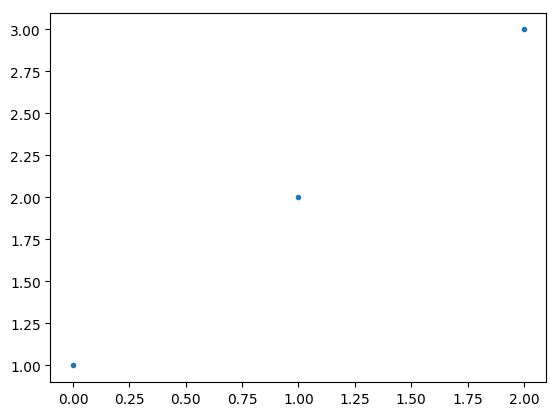

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f52e88b7898>

In [68]:
plot([1,2,3],".")

# Dates

* Julia has a structure called `DateTime` to represent a date and time.

In [69]:
using Dates
lastsecond = DateTime(1999,12,31,23,59,59)

1999-12-31T23:59:59

* The difference between two `DateTime`s returns a structure representing the number of milliseconds.

In [70]:
DateTime(2001,1,1)

2001-01-01T00:00:00

In [71]:
DateTime(2001,1,1) - DateTime(2000,1,1)

31622400000 milliseconds

* Convert this in days:

In [72]:

Dates.Day(DateTime(2001,1,1) - DateTime(2000,1,1))

366 days

* add a duration to a date

In [73]:
DateTime(2000,1,1) + Dates.Day(366)

2001-01-01T00:00:00

In [74]:
now()

2019-09-10T11:53:45.809

In [75]:
Dates.value(DateTime(2019,9,7) - now()) / 1000 / 60 / 60 / 24

-3.4956693634259257

In how many days is your next birthday?

In [76]:
Dates.Day(DateTime(2019,9,7) - DateTime(2019,2,12))

207 days

## Loops

* Let your computer do repetitive tasks!
* Loops have a counter which takes successively all elements of a row vector

In [78]:
for i = [1 2 10 20]
    @show i
end

i = 1
i = 2
i = 10
i = 20


* Loops are often used with a range of values

In [79]:
for i = 1:5
  @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5


* Explicit loops can sometimes be avoided:
* For example, sum all integer from 1 to 10

In [80]:
function sumupto(N)
   total = 0;
   for i = 1:N
        total = total + i;
        @show i,total
   end
    @show total
    return total
end
S = sumupto(10)

(i, total) = (1, 1)
(i, total) = (2, 3)
(i, total) = (3, 6)
(i, total) = (4, 10)
(i, total) = (5, 15)
(i, total) = (6, 21)
(i, total) = (7, 28)
(i, total) = (8, 36)
(i, total) = (9, 45)
(i, total) = (10, 55)
total = 55


55

In [81]:
length(findall(P .== 0))

5

Can simply be computed as `sum(1:10)`.

# if-statement

* Sometimes your code needs to behave differently depending on some conditions.

* if-statement has the following structure.

```julia
if some_conditions
  # do something
else
  # do something else
end
```
The else section can be omitted.

For example.

```julia
if x < 0
   x = -x;
end
```

* Which Julia function implements the last code example?